## TÍTULO: ANÁLISIS DE LOS ACUÍFEROS DE LA REGIÓN DE GUANACASTE SEGÚN LOS DATOS DEL SISTEMA DE MONITOREO DE ACUÍFEROS EN TIEMPO REAL (SIMASTIR)

Script realizado por:

Esmeralda Vargas Madrigal

Alexander Barrantes Herrera

Valeria Solis Monge

## **Descripción del proyecto y justificación**

El agua subterránea es una de las funtes de agua dulce más importantes para el consumo y las actividades humanas (Cerón et al. 2021), conocer su estado y calidad es importante para proteger este recurso. Ya sea mediante investigaciones y mediciones in situ, asi como el analisis de las bases de datos que se generan con las mediciones a este recurso.

El monitoreo periódico nos brinda informacion importante sobre lo que esta ocurriendo con su composición química y las presiones y riesgos de contaminación que podrían estar ocurriendo, esto nos permite tomar acciones preventivas y correctivas para mejorar la gestion del recurso (Deluchi et al. 2020; Ruz Vargas et al. 2020).

Monitorear, proteger y extraer de forma sostenible el agua subterranea es vital para los paises para el cumplimiento con el objetivo 6 de los Objetivos de Desarrollo Sostenible (ODS), por lo tanto la generacion de la informacion tambien es necesaria para reportar los indicadores de este objetivo y cumplir con la Agenda de Desarrollo Sostenible, con este objetivo se logra el proposito sobre el acceso ql agua potable (Foster et al. 2017).



## **Descripción del problema y el objetivo**

**Problema:**
Los datos tienen problemas de formato, se utilizan diferentes sensores y se desconocen los resultados que se obtienen de estos y la información se procesa de manera manual, lo que impide mostrar los resultados del monitoreo para la toma de decisiones de forma oportuna.



**Objetivo:**
Mejorar el procesamiento la información del monitoreo de aguas subterráneas de la Dirección de Agua del MINAE.

In [1]:
#Importar las bibliotecas necesarias para este trabajo

!pip install ydata-profiling
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=49359edce8f0d6039a2cfc2d3b0a7caa05b0b1a965712799e1b032ac3729b404
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [2]:
import pandas as pd
from sklearn import datasets
from ydata_profiling import ProfileReport
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics

## **Descripción del conjunto de datos**

In [3]:
# Cargar el Dataframe a partir de un archivo .csv desde un archivo en drive

from google.colab import drive
drive.mount("/content/drive")
df = pd.read_csv("/content/drive/MyDrive/SIMASTIR/SENSORES_SIMASTIR_04_2024.csv", sep=";") #en sep= se pone el signo con el que están separadas las columnas puede ser coma "," o punto y coma ";"


Mounted at /content/drive


<ipython-input-3-6c9de8bae842>:5: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/SIMASTIR/SENSORES_SIMASTIR_04_2024.csv", sep=";") #en sep= se pone el signo con el que están separadas las columnas puede ser coma "," o punto y coma ";"


In [4]:
#Análisis exploratorio de datos (EDA) con pandas-profiling

profile = ProfileReport(df, title="Informe de datos de SIMASTIR", explorative=True)

# Mostrar el informe de datos de SIMASTIR
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

## **Preprocesamiento de datos**


In [5]:
# Imprimir el tamaño del conjunto, para conocer cuántas filas y columnas tiene

df.shape

(115181, 24)

In [6]:
# Retornar los nombres de las columnas del dataframe df

df.columns

Index(['ID_DEVICE_LOG', 'ID_DEVICE_LOG_RECORDS', 'SITE',
       'FECHA_DE_LA_MEDICION', 'HORA_DE_LA_MEDICION', 'ACUIFERO', 'REFERENCIA',
       'PROPIETARIO', 'TIPO_DE_POZO', 'ACTUAL_CONDUCT_US_CM',
       'DENSITY_OF_WATER_G_CM3', 'LEVEL_DEPTH_M', 'PRESSURE_MBAR',
       'PRESSURE_MBAR_2', 'RESISTIVITY_OHM_CM', 'SALINITY_PSU', 'SENSOR_N',
       'SENSOR_N_2', 'SPECIFIC_CONDUCT_US_CM', 'TEMPERATURE',
       'TOT_DISS_SOLID_PPM', 'FECHA_INSERT_EN_BD', 'RECORD_DATE',
       'RECORD_TIME'],
      dtype='object')

**Identificación de los sitios**

In [7]:
# Retornar los diferentes códigos "valores" de la columna "SITE". Conocer la identificación de los sitios que tengo en el archivo.

df.SITE.unique()

array(['CN246', 'CN717', 'CN718', 'CN719', 'CN720', 'CN735', 'CN736',
       'CN741', 'CN745', 'CN746', 'CN748'], dtype=object)

In [8]:
# Ver la información sobre tipos de datos y valores no nulos
print(df.info())

# Tipos de datos:
#int64: números enteros sin decimales con un rango ambplio
#float64: valores numéricos que pueden tener decimales con alta precisión
#object: datos de tipo mixto, puede ser núemros enteros, decimales o texto este último también llamado string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115181 entries, 0 to 115180
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID_DEVICE_LOG           115181 non-null  int64  
 1   ID_DEVICE_LOG_RECORDS   115181 non-null  int64  
 2   SITE                    115181 non-null  object 
 3   FECHA_DE_LA_MEDICION    115181 non-null  object 
 4   HORA_DE_LA_MEDICION     115181 non-null  object 
 5   ACUIFERO                115181 non-null  object 
 6   REFERENCIA              115181 non-null  object 
 7   PROPIETARIO             115181 non-null  object 
 8   TIPO_DE_POZO            115181 non-null  object 
 9   ACTUAL_CONDUCT_US_CM    43193 non-null   float64
 10  DENSITY_OF_WATER_G_CM3  43193 non-null   object 
 11  LEVEL_DEPTH_M           115181 non-null  object 
 12  PRESSURE_MBAR           115181 non-null  float64
 13  PRESSURE_MBAR_2         115181 non-null  float64
 14  RESISTIVITY_OHM_CM  

In [9]:
# Imprimir cantidad de nulos por columna del dataframe df
print(df.isnull().sum())

ID_DEVICE_LOG                 0
ID_DEVICE_LOG_RECORDS         0
SITE                          0
FECHA_DE_LA_MEDICION          0
HORA_DE_LA_MEDICION           0
ACUIFERO                      0
REFERENCIA                    0
PROPIETARIO                   0
TIPO_DE_POZO                  0
ACTUAL_CONDUCT_US_CM      71988
DENSITY_OF_WATER_G_CM3    71988
LEVEL_DEPTH_M                 0
PRESSURE_MBAR                 0
PRESSURE_MBAR_2               0
RESISTIVITY_OHM_CM        71988
SALINITY_PSU              71988
SENSOR_N                      0
SENSOR_N_2                    0
SPECIFIC_CONDUCT_US_CM    71988
TEMPERATURE                   0
TOT_DISS_SOLID_PPM        71988
FECHA_INSERT_EN_BD            0
RECORD_DATE                   0
RECORD_TIME                   0
dtype: int64


**Combinar los datos de fecha y hora en una sola columna**

In [10]:
# Combinar las columnas "FECHA_DE_LA_MEDICION" y "HORA_DE_LA_MEDICION" en una nueva columna "FECHA/HORA_DE_MEDICION"

# Convertir las columnas de fecha a tipo datetime usando el formato adecuado
df["FECHA_DE_LA_MEDICION"] = pd.to_datetime(df["FECHA_DE_LA_MEDICION"], format='%d/%m/%Y')
df["HORA_DE_LA_MEDICION"] = pd.to_datetime(df["HORA_DE_LA_MEDICION"], format='%H:%M')

# Combinar las columnas de fecha y hora en una nueva columna
df["FECHA/HORA_DE_MEDICION"] = df["FECHA_DE_LA_MEDICION"].dt.strftime('%d/%m/%Y') + ' ' + df["HORA_DE_LA_MEDICION"].dt.strftime('%H:%M')

# Insertar la nueva columna en la posición 5
posicion_insercion = 5
nombre_columna_insertar = "FECHA/HORA_DE_MEDICION"
df.insert(posicion_insercion, nombre_columna_insertar, df.pop(nombre_columna_insertar))

# Convertir la columna "FECHA/HORA_DE_MEDICION" a tipo datetime
df["FECHA/HORA_DE_MEDICION"] = pd.to_datetime(df["FECHA/HORA_DE_MEDICION"], format='%d/%m/%Y' ' ' '%H:%M')

# Verificar el resultado
print(df["FECHA/HORA_DE_MEDICION"])





0        2022-01-01 00:00:00
1        2022-01-01 01:00:00
2        2022-01-01 02:00:00
3        2022-01-01 03:00:00
4        2022-01-01 04:00:00
                 ...        
115176   2023-12-03 20:00:00
115177   2023-12-03 21:00:00
115178   2023-12-03 22:00:00
115179   2023-12-03 23:00:00
115180   2023-12-04 00:00:00
Name: FECHA/HORA_DE_MEDICION, Length: 115181, dtype: datetime64[ns]


In [11]:
#Verificación de la columna de fecha y hora generada y en tipo datetime
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115181 entries, 0 to 115180
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ID_DEVICE_LOG           115181 non-null  int64         
 1   ID_DEVICE_LOG_RECORDS   115181 non-null  int64         
 2   SITE                    115181 non-null  object        
 3   FECHA_DE_LA_MEDICION    115181 non-null  datetime64[ns]
 4   HORA_DE_LA_MEDICION     115181 non-null  datetime64[ns]
 5   FECHA/HORA_DE_MEDICION  115181 non-null  datetime64[ns]
 6   ACUIFERO                115181 non-null  object        
 7   REFERENCIA              115181 non-null  object        
 8   PROPIETARIO             115181 non-null  object        
 9   TIPO_DE_POZO            115181 non-null  object        
 10  ACTUAL_CONDUCT_US_CM    43193 non-null   float64       
 11  DENSITY_OF_WATER_G_CM3  43193 non-null   object        
 12  LEVEL_DEPTH_M           115181

**Extraer los datos del sitio CN246 e identificar el úlitmo registro**

In [12]:
# SITIOS DE INTERÉS: 'CN246', 'CN717', 'CN718', 'CN719', 'CN720'

# Extraer los sitios de interés

pozo_1 = df["SITE"] == "CN246"

SITIO_CN246 = df[pozo_1]

SITIO_CN246

,ID_DEVICE_LOG,ID_DEVICE_LOG_RECORDS,SITE,FECHA_DE_LA_MEDICION,HORA_DE_LA_MEDICION,FECHA/HORA_DE_MEDICION,ACUIFERO,REFERENCIA,PROPIETARIO,TIPO_DE_POZO,...,RESISTIVITY_OHM_CM,SALINITY_PSU,SENSOR_N,SENSOR_N_2,SPECIFIC_CONDUCT_US_CM,TEMPERATURE,TOT_DISS_SOLID_PPM,FECHA_INSERT_EN_BD,RECORD_DATE,RECORD_TIME
0,4065516,478368083,CN246,2022-01-01,1900-01-01 00:00:00,2022-01-01 00:00:00,PANAMA,ASADA PLAYA PANAMA,ASADA DE PLAYA PANAMA,PERFORADO,...,1867.77,0.25,1,2,505.06,28.15,328.29,2/1/2022,1/1/2022,00:00
1,4065516,478368084,CN246,2022-01-01,1900-01-01 01:00:00,2022-01-01 01:00:00,PANAMA,ASADA PLAYA PANAMA,ASADA DE PLAYA PANAMA,PERFORADO,...,1867.04,0.25,1,2,505.25,28.15,328.41,2/1/2022,1/1/2022,01:00
2,4065516,478368085,CN246,2022-01-01,1900-01-01 02:00:00,2022-01-01 02:00:00,PANAMA,ASADA PLAYA PANAMA,ASADA DE PLAYA PANAMA,PERFORADO,...,1866.64,0.25,1,2,505.36,28.15,328.48,2/1/2022,1/1/2022,02:00
3,4065516,478368086,CN246,2022-01-01,1900-01-01 03:00:00,2022-01-01 03:00:00,PANAMA,ASADA PLAYA PANAMA,ASADA DE PLAYA PANAMA,PERFORADO,...,1867.15,0.25,1,2,505.22,28.15,328.39,2/1/2022,1/1/2022,03:00
4,4065516,478368087,CN246,2022-01-01,1900-01-01 04:00:00,2022-01-01 04:00:00,PANAMA,ASADA PLAYA PANAMA,ASADA DE PLAYA PANAMA,PERFORADO,...,1867.30,0.25,1,2,505.18,28.15,328.37,2/1/2022,1/1/2022,04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,4072824,478476760,CN246,2022-04-07,1900-01-01 18:00:00,2022-04-07 18:00:00,PANAMA,ASADA PLAYA PANAMA,ASADA DE PLAYA PANAMA,PERFORADO,...,0.00,0.00,1,2,0.00,0.00,0.00,8/4/2022,7/4/2022,18:00
2249,4072824,478476761,CN246,2022-04-07,1900-01-01 19:00:00,2022-04-07 19:00:00,PANAMA,ASADA PLAYA PANAMA,ASADA DE PLAYA PANAMA,PERFORADO,...,0.00,0.00,1,2,0.00,0.00,0.00,8/4/2022,7/4/2022,19:00
2250,4072824,478476762,CN246,2022-04-07,1900-01-01 20:00:00,2022-04-07 20:00:00,PANAMA,ASADA PLAYA PANAMA,ASADA DE PLAYA PANAMA,PERFORADO,...,0.00,0.00,1,2,0.00,0.00,0.00,8/4/2022,7/4/2022,20:00
2251,4072824,478476763,CN246,2022-04-07,1900-01-01 22:00:00,2022-04-07 22:00:00,PANAMA,ASADA PLAYA PANAMA,ASADA DE PLAYA PANAMA,PERFORADO,...,0.00,0.00,1,2,0.00,0.00,0.00,8/4/2022,7/4/2022,22:00


In [13]:
# Para la revisión de los valores de las columnas de interés, cambiar el nombre de la columna después de df.

SITIO_CN246.DENSITY_OF_WATER_G_CM3.unique()

array(['1.00', '1.0000', '1.00.00', nan, '0.00', '0.00.00'], dtype=object)

In [14]:
# Convertir la columna "DENSITY_OF_WATER_G_CM3" a tipo float (números con decimales)

SITIO_CN246["DENSITY_OF_WATER_G_CM3"] = pd.to_numeric(df["DENSITY_OF_WATER_G_CM3"], errors='coerce')

#Calcular el promedio de los datos vecinos
SITIO_CN246["DENSITY_OF_WATER_G_CM3"] = SITIO_CN246["DENSITY_OF_WATER_G_CM3"].fillna(method='ffill')
SITIO_CN246["DENSITY_OF_WATER_G_CM3"] = SITIO_CN246["DENSITY_OF_WATER_G_CM3"].fillna(method='bfill')

print(SITIO_CN246.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2253 entries, 0 to 2252
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID_DEVICE_LOG           2253 non-null   int64         
 1   ID_DEVICE_LOG_RECORDS   2253 non-null   int64         
 2   SITE                    2253 non-null   object        
 3   FECHA_DE_LA_MEDICION    2253 non-null   datetime64[ns]
 4   HORA_DE_LA_MEDICION     2253 non-null   datetime64[ns]
 5   FECHA/HORA_DE_MEDICION  2253 non-null   datetime64[ns]
 6   ACUIFERO                2253 non-null   object        
 7   REFERENCIA              2253 non-null   object        
 8   PROPIETARIO             2253 non-null   object        
 9   TIPO_DE_POZO            2253 non-null   object        
 10  ACTUAL_CONDUCT_US_CM    2251 non-null   float64       
 11  DENSITY_OF_WATER_G_CM3  2253 non-null   float64       
 12  LEVEL_DEPTH_M           2253 non-null   object       

<ipython-input-14-1d8d5ba2f1d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SITIO_CN246["DENSITY_OF_WATER_G_CM3"] = pd.to_numeric(df["DENSITY_OF_WATER_G_CM3"], errors='coerce')
<ipython-input-14-1d8d5ba2f1d9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SITIO_CN246["DENSITY_OF_WATER_G_CM3"] = SITIO_CN246["DENSITY_OF_WATER_G_CM3"].fillna(method='ffill')
<ipython-input-14-1d8d5ba2f1d9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [15]:
# Convertir la columna "LEVEL_DEPTH_M" a tipo float (números con decimales)

df["LEVEL_DEPTH_M"] = pd.to_numeric(df["LEVEL_DEPTH_M"], errors='coerce')

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115181 entries, 0 to 115180
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ID_DEVICE_LOG           115181 non-null  int64         
 1   ID_DEVICE_LOG_RECORDS   115181 non-null  int64         
 2   SITE                    115181 non-null  object        
 3   FECHA_DE_LA_MEDICION    115181 non-null  datetime64[ns]
 4   HORA_DE_LA_MEDICION     115181 non-null  datetime64[ns]
 5   FECHA/HORA_DE_MEDICION  115181 non-null  datetime64[ns]
 6   ACUIFERO                115181 non-null  object        
 7   REFERENCIA              115181 non-null  object        
 8   PROPIETARIO             115181 non-null  object        
 9   TIPO_DE_POZO            115181 non-null  object        
 10  ACTUAL_CONDUCT_US_CM    43193 non-null   float64       
 11  DENSITY_OF_WATER_G_CM3  43193 non-null   object        
 12  LEVEL_DEPTH_M           115174

In [16]:
# Convertir todos los valores de la columna "LEVEL_DEPTH_M" a negativos
df["LEVEL_DEPTH_M"] = -df["LEVEL_DEPTH_M"]

# Verificar el resultado
print(df["LEVEL_DEPTH_M"])

0        -6.32
1        -6.31
2        -6.31
3        -6.32
4        -6.32
          ... 
115176   -6.93
115177   -6.93
115178   -6.93
115179   -6.94
115180   -6.94
Name: LEVEL_DEPTH_M, Length: 115181, dtype: float64


In [17]:
# Para la revisión de los valores de las columnas de interés, cambiar el nombre de la columna después de df.

df.DENSITY_OF_WATER_G_CM3.unique()

#array(['1.00', '1.0000', '1.00.00', nan, '0.00', '0.00.00', '1.01',
     #  '1.000', '1.01.01', '1.0101', '1.011'], dtype=object)

     #TAREA
     #REVISAR SI AL CONVERTIR LOS DATOS EN FLOTANTE NO ME ELIMINA EL DATO /Respuesta: Si lo elimina

array(['1.00', '1.0000', '1.00.00', nan, '0.00', '0.00.00', '1.01',
       '1.000', '1.01.01', '1.0101', '1.011'], dtype=object)

**Gráficos**

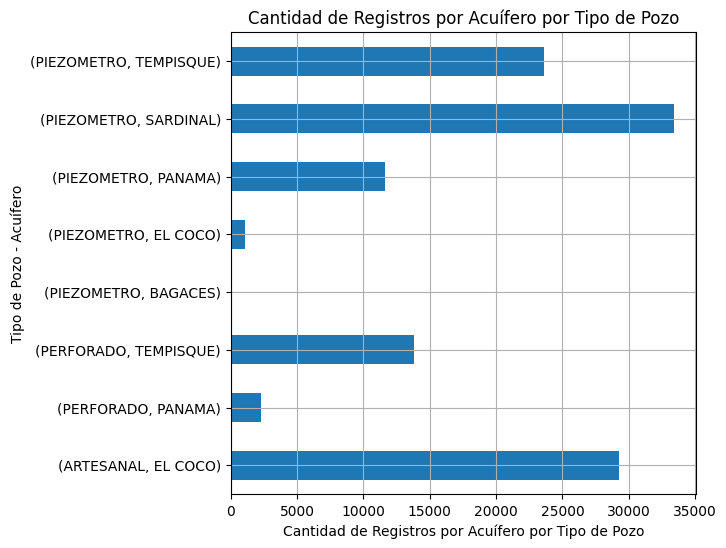

In [18]:
#Gráfico de Barras de Cantidad de Registros por Acuífero por Tipo de Pozo
# Tamaño del gráfico
plt.figure(figsize=(6, 6))

# Agrupar datos por Acuífero y Tipo de Pozo, y obtener el conteo de registros
acuifero_conteo = df.groupby(['TIPO_DE_POZO','ACUIFERO'])['ID_DEVICE_LOG'].count()

# Crear gráfico de barras
acuifero_conteo.plot(kind='barh')

# Título del gráfico
plt.title('Cantidad de Registros por Acuífero por Tipo de Pozo')

# Etiqueta del eje Y
plt.ylabel('Tipo de Pozo - Acuífero')

# Etiqueta del eje X
plt.xlabel('Cantidad de Registros por Acuífero por Tipo de Pozo')
plt.grid()
plt.show()


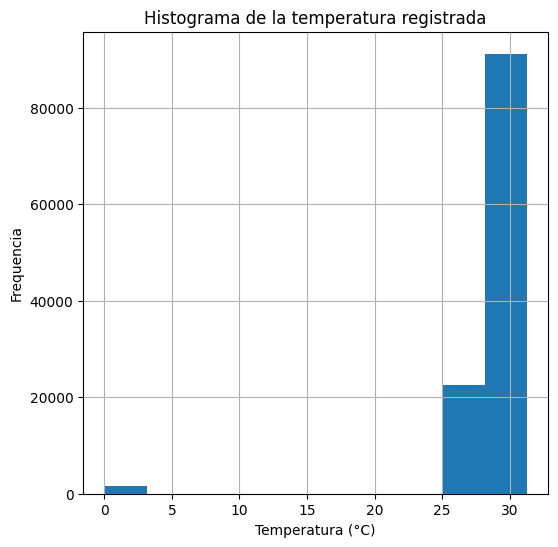

In [19]:
# Histograma de Temperatura
# Tamaño del gráfico
plt.figure(figsize=(6, 6))

# Crear un histograma de la columna 'sepal length (cm)' del dataframe iris_df
df['TEMPERATURE'].hist()

# Título del grafico
plt.title('Histograma de la temperatura registrada')
# Etiqueta del eje X
plt.xlabel('Temperatura (°C)')
# Etiqueta del eje Y
plt.ylabel('Frequencia')

plt.show()

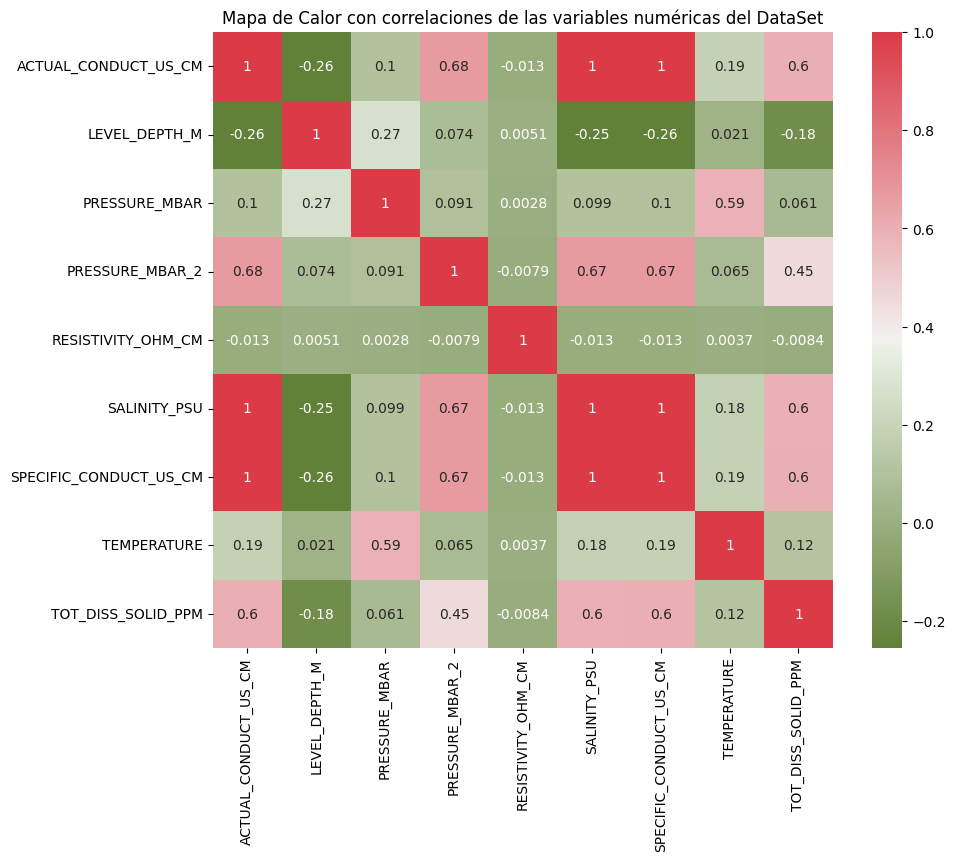

In [36]:
#Correlación conductividad-temperatura y nivel
# Se procede en realizar el mapa de correlación para identificar las variables que tiene una relación fuerte.

def correlation_heatmap(df):
    # Crear una figura y eje
    _, ax=plt.subplots(figsize=(10,8))
    # Crear una paleta de colores
    colormap = sns.diverging_palette(110 ,10, as_cmap=True)
    # Agregar los niveles de correlación a la paleta
    sns.heatmap(df.corr(),annot=True,cmap=colormap)

# Excluir las columnas para el cálculo de la correlación que contienen valores nulos o que no corresponden a campos numéricos
df_corr = df.drop(['ID_DEVICE_LOG','ID_DEVICE_LOG_RECORDS','SENSOR_N_2','SENSOR_N','FECHA_DE_LA_MEDICION','HORA_DE_LA_MEDICION','FECHA/HORA_DE_MEDICION','SITE','ACUIFERO','REFERENCIA','PROPIETARIO','TIPO_DE_POZO','DENSITY_OF_WATER_G_CM3','FECHA_INSERT_EN_BD','RECORD_DATE','RECORD_TIME'], axis='columns')
correlation_heatmap(df_corr)

# Título del gráfico
plt.title('Mapa de Calor con correlaciones de las variables numéricas del DataSet')

plt.show()

#Cada parámetro se correlaciona con temperatura SD o SST


In [21]:
# Con base en la correlación fuerte que indican las variables "SALINITY_PSU" y "SPECIFIC_CONDUCT_US_CM", y a criterio experto del técnico del área,
# se realiza el siguiente gráfico de dispersión para identificar para visualizar su tendencia y agrupamiento.

#Filtra por las columnas
df_cluster_2 = df.loc[:,("SPECIFIC_CONDUCT_US_CM","SALINITY_PSU","ACUIFERO")]

#Elimina filas con valores "NA"
df_cluster_2 = df_cluster_2.dropna()

#Verificación de los valores nulos
df_cluster_2

,SPECIFIC_CONDUCT_US_CM,SALINITY_PSU,ACUIFERO
0,505.06,0.25,PANAMA
1,505.25,0.25,PANAMA
2,505.36,0.25,PANAMA
3,505.22,0.25,PANAMA
4,505.18,0.25,PANAMA
...,...,...,...
84750,703.68,0.35,EL COCO
84751,707.14,0.35,EL COCO
84752,709.09,0.35,EL COCO
84753,710.39,0.35,EL COCO


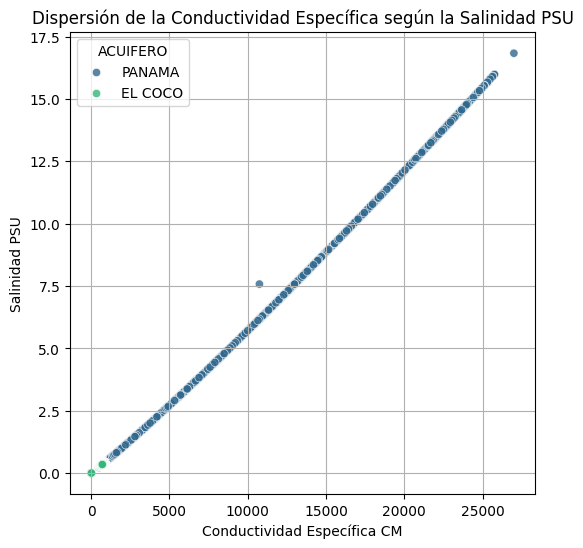

In [22]:
# Gráfico de Dispersión

figura = plt.figure(figsize=(6, 6))

# Utilizando la función scatterplot de la biblioteca seaborn que se puede graficar usando dataframe
ax = sns.scatterplot(data=df_cluster_2, x='SPECIFIC_CONDUCT_US_CM', y='SALINITY_PSU', hue='ACUIFERO', palette='viridis', alpha=0.8)

# Agregar las etiquetas de los ejes
ax.set(xlabel='Conductividad Específica CM', ylabel='Salinidad PSU')
plt.grid()

# Título del gráfico
plt.title('Dispersión de la Conductividad Específica según la Salinidad PSU')
plt.show()

# Ejemplo en Clase: Guardar imagen
figura.savefig("test.svg")

**Extraer los datos del sitio CN246 e identificar el úlitmo registro**

In [23]:
# Ordenar el DataFrame por la columna "FECHA/HORA_DE_MEDICION" en orden descendente
SITIO_CN246 = SITIO_CN246.sort_values("FECHA/HORA_DE_MEDICION", ascending=False)

# Obtener el último registro según la fecha y hora
ultimo_registro = SITIO_CN246.iloc[0]

# Imprimir el último registro
print("Último registro:")
print(ultimo_registro)

Último registro:
ID_DEVICE_LOG                           4072824
ID_DEVICE_LOG_RECORDS                 478476764
SITE                                      CN246
FECHA_DE_LA_MEDICION        2022-04-07 00:00:00
HORA_DE_LA_MEDICION         1900-01-01 23:00:00
FECHA/HORA_DE_MEDICION      2022-04-07 23:00:00
ACUIFERO                                 PANAMA
REFERENCIA                   ASADA PLAYA PANAMA
PROPIETARIO               ASADA DE PLAYA PANAMA
TIPO_DE_POZO                          PERFORADO
ACTUAL_CONDUCT_US_CM                        0.0
DENSITY_OF_WATER_G_CM3                      0.0
LEVEL_DEPTH_M                              0.00
PRESSURE_MBAR                               0.0
PRESSURE_MBAR_2                             0.0
RESISTIVITY_OHM_CM                          0.0
SALINITY_PSU                                0.0
SENSOR_N                                      1
SENSOR_N_2                                    2
SPECIFIC_CONDUCT_US_CM                      0.0
TEMPERATURE            

In [24]:
# Definir el rango de tiempo deseado
inicio = '2022-04-01 00:00:00'
fin = '2022-04-07 23:00:00'

# Filtrar las filas dentro del rango de tiempo
CN246 = SITIO_CN246[(SITIO_CN246["FECHA/HORA_DE_MEDICION"] > inicio) & (SITIO_CN246["FECHA/HORA_DE_MEDICION"] <= fin)]

# Imprimir el nuevo DataFrame

CN246

,ID_DEVICE_LOG,ID_DEVICE_LOG_RECORDS,SITE,FECHA_DE_LA_MEDICION,HORA_DE_LA_MEDICION,FECHA/HORA_DE_MEDICION,ACUIFERO,REFERENCIA,PROPIETARIO,TIPO_DE_POZO,...,RESISTIVITY_OHM_CM,SALINITY_PSU,SENSOR_N,SENSOR_N_2,SPECIFIC_CONDUCT_US_CM,TEMPERATURE,TOT_DISS_SOLID_PPM,FECHA_INSERT_EN_BD,RECORD_DATE,RECORD_TIME
2252,4072824,478476764,CN246,2022-04-07,1900-01-01 23:00:00,2022-04-07 23:00:00,PANAMA,ASADA PLAYA PANAMA,ASADA DE PLAYA PANAMA,PERFORADO,...,0.0,0.0,1,2,0.0,0.0,0.0,8/4/2022,7/4/2022,23:00
2251,4072824,478476763,CN246,2022-04-07,1900-01-01 22:00:00,2022-04-07 22:00:00,PANAMA,ASADA PLAYA PANAMA,ASADA DE PLAYA PANAMA,PERFORADO,...,0.0,0.0,1,2,0.0,0.0,0.0,8/4/2022,7/4/2022,22:00
2250,4072824,478476762,CN246,2022-04-07,1900-01-01 20:00:00,2022-04-07 20:00:00,PANAMA,ASADA PLAYA PANAMA,ASADA DE PLAYA PANAMA,PERFORADO,...,0.0,0.0,1,2,0.0,0.0,0.0,8/4/2022,7/4/2022,20:00
2249,4072824,478476761,CN246,2022-04-07,1900-01-01 19:00:00,2022-04-07 19:00:00,PANAMA,ASADA PLAYA PANAMA,ASADA DE PLAYA PANAMA,PERFORADO,...,0.0,0.0,1,2,0.0,0.0,0.0,8/4/2022,7/4/2022,19:00
2248,4072824,478476760,CN246,2022-04-07,1900-01-01 18:00:00,2022-04-07 18:00:00,PANAMA,ASADA PLAYA PANAMA,ASADA DE PLAYA PANAMA,PERFORADO,...,0.0,0.0,1,2,0.0,0.0,0.0,8/4/2022,7/4/2022,18:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,4072354,478471581,CN246,2022-04-01,1900-01-01 06:00:00,2022-04-01 06:00:00,PANAMA,ASADA PLAYA PANAMA,ASADA DE PLAYA PANAMA,PERFORADO,...,0.0,0.0,1,2,0.0,0.0,0.0,2/4/2022,1/4/2022,06:00
2093,4072354,478471580,CN246,2022-04-01,1900-01-01 05:00:00,2022-04-01 05:00:00,PANAMA,ASADA PLAYA PANAMA,ASADA DE PLAYA PANAMA,PERFORADO,...,0.0,0.0,1,2,0.0,0.0,0.0,2/4/2022,1/4/2022,05:00
2092,4072354,478471579,CN246,2022-04-01,1900-01-01 04:00:00,2022-04-01 04:00:00,PANAMA,ASADA PLAYA PANAMA,ASADA DE PLAYA PANAMA,PERFORADO,...,0.0,0.0,1,2,0.0,0.0,0.0,2/4/2022,1/4/2022,04:00
2091,4072354,478471578,CN246,2022-04-01,1900-01-01 02:00:00,2022-04-01 02:00:00,PANAMA,ASADA PLAYA PANAMA,ASADA DE PLAYA PANAMA,PERFORADO,...,0.0,0.0,1,2,0.0,0.0,0.0,2/4/2022,1/4/2022,02:00


**Envío de la información del pozo CN246 a un archivo csv en el Drive o en la carpeta de Colab**

In [25]:
#Envío de los registros del código CN246 a un archivo en mi Drive

CN246.to_csv("/content/drive/MyDrive/SIMASTIR/CN246.csv")

In [26]:
#Esta es otra forma de hacerlo, me genera el archivo en esta misma herramienta de colab, en el ícono de carpeta que se muestra a la izquierda

CN246.to_csv("CN246.csv")

**Extraer los datos del sitio CN717**

In [27]:
# Accede a un registro y toda su información (como ejemplo el último registro es el 115180, ya que la cuenta de las filas inicia en cero "0")

df.loc[115180]

ID_DEVICE_LOG                                        4104904
ID_DEVICE_LOG_RECORDS                              478933337
SITE                                                   CN748
FECHA_DE_LA_MEDICION                     2023-12-04 00:00:00
HORA_DE_LA_MEDICION                      1900-01-01 00:00:00
FECHA/HORA_DE_MEDICION                   2023-12-04 00:00:00
ACUIFERO                                            SARDINAL
REFERENCIA                ASOSIACIÓN DE DESARROLLO DE ARTOLA
PROPIETARIO                                                .
TIPO_DE_POZO                                      PIEZOMETRO
ACTUAL_CONDUCT_US_CM                                     NaN
DENSITY_OF_WATER_G_CM3                                   NaN
LEVEL_DEPTH_M                                          -6.94
PRESSURE_MBAR                                         1001.6
PRESSURE_MBAR_2                                      1930.73
RESISTIVITY_OHM_CM                                       NaN
SALINITY_PSU            

In [28]:
# Filtrar las filas que contienen strings (texto) en las columnas "ACUIFERO" y "LEVEL_DEPTH_M"

Texto_acui = df["ACUIFERO"].loc[df["ACUIFERO"].apply(lambda x: isinstance(x, object))].tolist()

# Filtrar las filas que contienen strings en la columna 'LEVEL_DEPTH_MB'
#Texto_profundidad = df["LEVEL_DEPTH_M"].loc[df["LEVEL_DEPTH_M"].apply(lambda x: isinstance(x, str))].tolist()

# Imprimir los resultados
print("Texto en la columna ACUIFERO:")
print(Texto_acui)

#print("\n Texto en la columna LEVEL_DEPTH_M:")
#print(Texto_profundidad)

Texto en la columna ACUIFERO:
['PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA', 'PANAMA',

In [29]:
# Filtrar las filas que contienen strings (texto) en las columnas "DENSITY_OF_WATER_G_CM3" y "LEVEL_DEPTH_M"

Texto_densidad = df["DENSITY_OF_WATER_G_CM3"].loc[df["DENSITY_OF_WATER_G_CM3"].apply(lambda x: isinstance(x, str))].tolist()

# Filtrar las filas que contienen strings en la columna 'LEVEL_DEPTH_MB'
Texto_profundidad = df["LEVEL_DEPTH_M"].loc[df["LEVEL_DEPTH_M"].apply(lambda x: isinstance(x, str))].tolist()

# Imprimir los resultados
print("Texto en la columna DENSITY_OF_WATER_G_CM3:")
print(Texto_densidad)

print("\n Texto en la columna LEVEL_DEPTH_M:")
print(Texto_profundidad)


Texto en la columna DENSITY_OF_WATER_G_CM3:
['1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.

In [30]:
# Seleccionar la columna "DENSITY_OF_WATER_G_CM3"
datos_dens = df["DENSITY_OF_WATER_G_CM3"]

# Imprimir la columna seleccionada
print(datos_dens)



0         1.00
1         1.00
2         1.00
3         1.00
4         1.00
          ... 
115176     NaN
115177     NaN
115178     NaN
115179     NaN
115180     NaN
Name: DENSITY_OF_WATER_G_CM3, Length: 115181, dtype: object


**2. Pasar el valor de la profundidad a tipo número y luego a negativo**

In [31]:
# Convertir la columna "profundidad" a tipo float

df["LEVEL_DEPTH_M"] = df["LEVEL_DEPTH_M"].astype(float)


# Verificar el tipo de dato de la columna "profundidad"
print(df.dtypes)


ID_DEVICE_LOG                      int64
ID_DEVICE_LOG_RECORDS              int64
SITE                              object
FECHA_DE_LA_MEDICION      datetime64[ns]
HORA_DE_LA_MEDICION       datetime64[ns]
FECHA/HORA_DE_MEDICION    datetime64[ns]
ACUIFERO                          object
REFERENCIA                        object
PROPIETARIO                       object
TIPO_DE_POZO                      object
ACTUAL_CONDUCT_US_CM             float64
DENSITY_OF_WATER_G_CM3            object
LEVEL_DEPTH_M                    float64
PRESSURE_MBAR                    float64
PRESSURE_MBAR_2                  float64
RESISTIVITY_OHM_CM               float64
SALINITY_PSU                     float64
SENSOR_N                           int64
SENSOR_N_2                         int64
SPECIFIC_CONDUCT_US_CM           float64
TEMPERATURE                      float64
TOT_DISS_SOLID_PPM               float64
FECHA_INSERT_EN_BD                object
RECORD_DATE                       object
RECORD_TIME     

In [32]:
prof = df["LEVEL_DEPTH_M"]

print(type(prof))

prof


<class 'pandas.core.series.Series'>


0        -6.32
1        -6.31
2        -6.31
3        -6.32
4        -6.32
          ... 
115176   -6.93
115177   -6.93
115178   -6.93
115179   -6.94
115180   -6.94
Name: LEVEL_DEPTH_M, Length: 115181, dtype: float64

In [33]:
# Convertir valores de la columna "LEVEL_DEPTH_M" a negativos
df["LEVEL_DEPTH_M"] = df["LEVEL_DEPTH_M"].apply(lambda x: -x)

# Mostrar el DataFrame resultante
print(df)

        ID_DEVICE_LOG  ID_DEVICE_LOG_RECORDS   SITE FECHA_DE_LA_MEDICION  \
0             4065516              478368083  CN246           2022-01-01   
1             4065516              478368084  CN246           2022-01-01   
2             4065516              478368085  CN246           2022-01-01   
3             4065516              478368086  CN246           2022-01-01   
4             4065516              478368087  CN246           2022-01-01   
...               ...                    ...    ...                  ...   
115176        4104904              478933333  CN748           2023-12-03   
115177        4104904              478933334  CN748           2023-12-03   
115178        4104904              478933335  CN748           2023-12-03   
115179        4104904              478933336  CN748           2023-12-03   
115180        4104904              478933337  CN748           2023-12-04   

       HORA_DE_LA_MEDICION FECHA/HORA_DE_MEDICION  ACUIFERO  \
0      1900-01-01 00:00:

## **Resultados**
-	Analizando la cantidad registros por Acuífero por tipo de pozo se identifica que la mayor cantidad de registros se ha presentado en el pozo “Piezómetro” en el acuífero “Sardinal” y en el pozo “Artesanal” en el acuífero “El Coco”. Por otra parte, el pozo “Piezómetro” en el acuífero “Bagaces” cuenta con una cantidad demasiado mínima de datos ingresados.

-	Correspondiente a las temperaturas registradas, se identifica que la mayor participación de los registros de dichas temperaturas donde se ubican los respectivos pozos y acuíferos oscila entre los 25°C y los 32°C; donde predomina las temperaturas a partir de los 29°C.Además, según este parámetro el agua es posible extraerla para purificarla para el consumo humano.

-	Tomando 9 variables numéricas del set de datos, se analiza la correlación entre las variables, donde las correlaciones relevantes se presentan siendo en primer instancia mayor correlación de forma negativa entre las variables “SALINITY_PSU” y “SPECIFIC_CONDUCT_US_CM”; por otra parte, se presenta en segunda instancia correlación media entre “LEVEL_DEPTH_M” y “PRESSURE_MBAR”. También, ambos parámetros son afectados por las sales disueltas, vemos que estos dos parámetros también están correlacionados con los sólidos suspendidos totales.
Por otra parte, la temperatura está ligeramente correlacionada con la presión, tanto la presión como la temperatura afectan la cantidad de oxígeno diluido en el agua, por lo que es importante revisar estos parámetros

-	Como producto del análisis de la matriz de correlación, tomando como base las variables “SALINITY_PSU” y “SPECIFIC_CONDUCT_US_CM” siendo la mayor correlación de forma negativa presentada, se analiza el comportamiento presentado en el gráfico de dispersión donde a medida que incrementa la “Salinidad PSU” proporcionalmente crece la “Conductividad Especifica CM” identificada en los acuíferos “Panamá” y “El Coco”.






## **Conclusiones**

-	Luego del tratamiento de datos, se lograron construir gráficas que muestran el comportamiento de los datos y las correlaciones que existen entre los diferentes parámetros.

-	Se logró obtener un archivo que permite el manejo y análisis del conjunto de datos para valorar la tendencia de los datos de los acuíferos y analizar la relación entre ellos.

- Se evitará el trabajo manual por parte del área técnica, en donde con esta herramienta se contará con información para la toma de decisiones de manera más expedita.




## **Referencias**
Cerón, Lina M., Sarria, Jhon D., Torres, Johan S., & Soto-Paz, Jonathan. (2021). Agua subterránea: tendencias y desarrollo científico. Información tecnológica, 32(1), 47-56. https://dx.doi.org/10.4067/S0718-07642021000100047

Deluchi, Marta., Rojo, Adolfo., Laurencena, Patricia., Kruse, Eduardo. (2020). Importancia del monitoreo del agua subterránea en zonas urbanizadas. Core, 192-197. https://core.ac.uk/download/pdf/328879778.pdf

Ruz Vargas, Claudia & Samaniego, Lucía & Medina, Miguel. (2020). Estado actual del Monitoreo de agua subterránea en América Latina e Introducción al programa GGMN. Aqua-LAC. 12. 118-126. : https://www.researchgate.net/publication/349386499

Foster, Stephen., Carter, Richard., & Tyson., Gillian. (2017). Los objetivos de desarrollo sustentable (ODS) de la Organización de Naciones Unidas (ONU) para el 2030 INDICADORES ESENCIALES PARA EL AGUA SUBTERRÁNEA. Serie, 1-8. https://iah.org/wp-content/uploads/2019/10/IAH_SDGs_espanol.pdf